In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
notebook_start_time = time.time()

In [3]:
raw_data = pd.read_csv('epi_r.csv')
raw_data = raw_data.dropna(axis=0, how="any")

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.shape

(15864, 680)

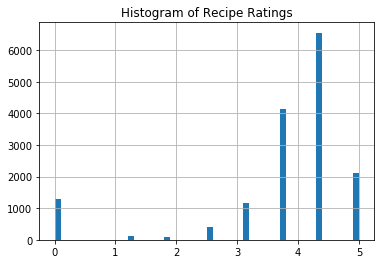

In [6]:
#Recipe ratings histogram
raw_data.rating.hist(bins=50)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [8]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
raw_data.rating.describe()

count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [10]:
#Outcome
#y_modified = np.where(raw_data["rating"] > 4,1,0)

In [11]:
#def start_SVR():
#    svr = SVR()
#    x = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
#    y_modified = np.where(raw_data["rating"] > 3,1,0)
#    return x, y_modified, svr

In [12]:
def start_SVR():
    start_time = time.time()
    svr = SVR()
    x = raw_data.drop(['rating', 'title'], 1)
    y_modified = np.where(raw_data["rating"] > 4,1,0)
    # Add test-train-split
    return x, y_modified, svr,start_time

In [13]:
def fit_and_print(feature_selector):
    x_data, y_modified, svr,start_time = feature_selector
    x_train,x_test,y_train,y_test=train_test_split(x_data,y_modified,test_size=.33,random_state=47)
    svr.fit(x_train,y_train)
    print(x_data.shape)
    print("Test Score: %0.9f" %(svr.score(x_test, y_test)))
    print("Train Cross Validation:")
    print(cross_val_score(svr, x_train, y_train, cv=5))
    print("\nRuntime:")
    print("--- %s seconds ---" % (time.time() - start_time))

In [14]:
def variance_threshold_selector():
    x, y_modified, svr,start_time = start_SVR()
    sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
    x_data=sel.fit_transform(x)
    return x_data, y_modified, svr,start_time

In [15]:
start_SVR()
fit_and_print(variance_threshold_selector())

(15864, 31)
Test Score: 0.064800892
Train Cross Validation:
[ 0.05507307  0.05216104  0.06705468  0.03637034  0.05604552]

Runtime:
--- 198.9656286239624 seconds ---


In [16]:
def select_k_best():
    x, y_modified, svr,start_time = start_SVR()
    x_data = SelectKBest(chi2, k=30).fit_transform(x, y_modified)
    return x_data, y_modified, svr,start_time

In [17]:
start_SVR()
fit_and_print(select_k_best())

(15864, 30)
Test Score: 0.049841525
Train Cross Validation:
[ 0.04434213  0.04475305  0.05712315  0.0266637   0.0479028 ]

Runtime:
--- 196.83674216270447 seconds ---


In [18]:
start_SVR()
fit_and_print(select_k_best())

(15864, 30)
Test Score: 0.049841525
Train Cross Validation:
[ 0.04434213  0.04475305  0.05712315  0.0266637   0.0479028 ]

Runtime:
--- 198.36211490631104 seconds ---


In [19]:
def pca_selector(number_components):
    x, y_modified, svr,start_time = start_SVR()
    pca = PCA(n_components=number_components)
    pca.fit(x,y_modified)
    x_data=pca.transform(x)
    return x_data, y_modified, svr,start_time

In [20]:
#Using PCA for feature selection
numbers= (5,10,15,20,25,30)
for num in numbers:
    start_SVR()
    print("%0.f PCA components:" % (num))
    fit_and_print(pca_selector(num))

5 PCA components:
(15864, 5)
Test Score: 0.099436011
Train Cross Validation:
[ 0.06948432  0.0782298   0.07420976  0.0736022   0.07012788]

Runtime:
--- 149.18860363960266 seconds ---
10 PCA components:
(15864, 10)
Test Score: 0.097181844
Train Cross Validation:
[ 0.07053231  0.07780628  0.07813204  0.07056281  0.07113593]

Runtime:
--- 146.75461220741272 seconds ---
15 PCA components:
(15864, 15)
Test Score: 0.090664592
Train Cross Validation:
[ 0.06966791  0.07510289  0.07732745  0.06419589  0.0690337 ]

Runtime:
--- 145.8263750076294 seconds ---
20 PCA components:
(15864, 20)
Test Score: 0.084392748
Train Cross Validation:
[ 0.06763723  0.07104579  0.07733655  0.05743546  0.06565854]

Runtime:
--- 152.42260432243347 seconds ---
25 PCA components:
(15864, 25)
Test Score: 0.077234619
Train Cross Validation:
[ 0.06276443  0.06532745  0.07587104  0.05101271  0.06228245]

Runtime:
--- 164.29536318778992 seconds ---
30 PCA components:
(15864, 30)
Test Score: 0.070870418
Train Cross Valida

In [21]:
print("\nNotebook Runtime:")
print("--- %s seconds ---" % (time.time() - notebook_start_time))


Notebook Runtime:
--- 1562.043972492218 seconds ---


In [22]:
def select_from_model():
    x, y_modified, svr,start_time = start_SVR()
    clf = LassoCV()
    sfm = SelectFromModel(clf, threshold=0.45)
    sfm.fit(x, y_modified)
    sfm.transform(x)
    x_data = sfm.transform(x)
    return x_data, y_modified, svr,start_time

In [ ]:
def select_from_model_lasso():
    x, y_modified, svr,start_time = start_SVR()
    lsvc = LinearSVC(C=1e25,penalty="l1", dual=False)
    lsvc.fit(x, y_modified)
    model = SelectFromModel(lsvc, prefit=True)
    x_data = model.transform(x)
    return x_data, y_modified, svr,start_time

In [ ]:
start_SVR()
fit_and_print(select_from_model_lasso())


(15864, 661)
Test Score: -0.054560297
Train Cross Validation:


In [ ]:
print("\nNotebook Runtime:")
print("--- %s seconds ---" % (time.time() - notebook_start_time))

In [ ]:
start_SVR()
fit_and_print(select_from_model())


In [ ]:
#xa = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
#svc = SVC(C=1)
#rfe = RFE(estimator=svc, n_features_to_select=20, step=1)
#rfe.fit(xa, y_modified)
#x2=rfe.transform(xa)

In [ ]:
#x2.shape

In [ ]:
#clf = ExtraTreesClassifier()
#clf = clf.fit(xa, y_modified)
#clf.feature_importances_array([ 0.04...,  0.05...,  0.4...,  0.4...])
#model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)
#X_new.shape